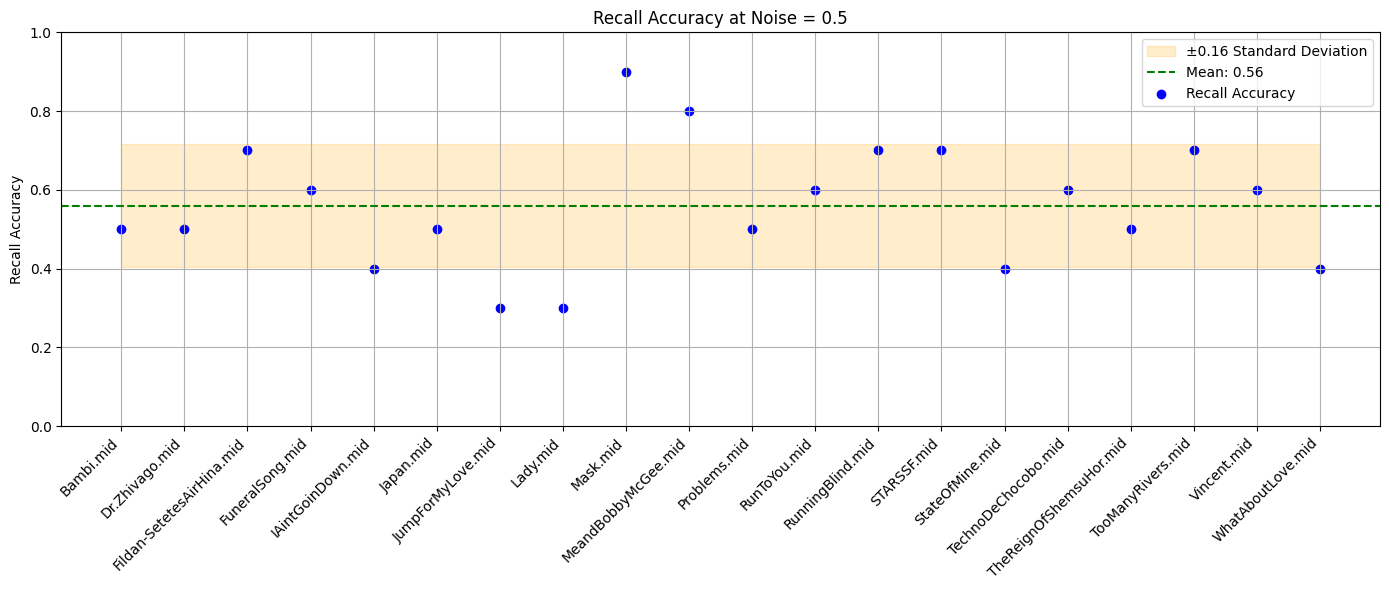

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import re

# Read and extract data from the log file
filename_recall_map = {}

with open("log.txt", "r") as f:
    for line in f:
        match = re.search(r"midi_files/(.+?): Noise Level 0\.5: Recall Accuracy ([0-9.]+)", line)
        if match:
            filename = match.group(1)
            recall = float(match.group(2))
            filename_recall_map[filename] = recall

# Sort alphabetically
sorted_items = sorted(filename_recall_map.items(), key=lambda x: x[0])
sorted_filenames, sorted_recalls = zip(*sorted_items)

# Calculate mean and standard deviation
mean_val = np.mean(sorted_recalls)
std_val = np.std(sorted_recalls)

# Plotting
plt.figure(figsize=(14, 6))

# Shaded region for ±1 std deviation
plt.fill_between(
    range(len(sorted_recalls)),
    [mean_val - std_val] * len(sorted_recalls),
    [mean_val + std_val] * len(sorted_recalls),
    color='orange',
    alpha=0.2,
    label=f'±{std_val:.2f} Standard Deviation'
)

# Horizontal mean line
plt.axhline(mean_val, color='green', linestyle='--', label=f'Mean: {mean_val:.2f}')

# Scatter plot
plt.scatter(range(len(sorted_recalls)), sorted_recalls, color='blue', label='Recall Accuracy')

# Customize x-axis
plt.xticks(range(len(sorted_filenames)), sorted_filenames, rotation=45, ha='right')
plt.ylim(0, 1)
plt.ylabel('Recall Accuracy')
plt.title('Recall Accuracy at Noise = 0.5')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Save or show plot
plt.show()
